In [1]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools as it

#set file path
copopulationdata = os.path.join('data', 'Colorado_Population.csv')
coarrestdata = os.path.join('data', 'ArrestRates.csv')
arrestandpopdata = os.path.join('data', 'crime_data_w_population_and_crime_rate.csv')

#pull data from file into lists for population and arrest data
allpop = pd.read_csv(copopulationdata)
allarrest = pd.read_csv(coarrestdata)
allpopandarrest = pd.read_csv(arrestandpopdata)
# allpop.describe()
# allarrest
allpop.sort_values(by=['Year','Age Group'], inplace=True)
allpop.head()


,Year,Population,Age Group,Year Group
38,1980,2097530,Adult,1980-1984
0,1980,379611,Juvenile,1980-1984
39,1981,2159216,Adult,1980-1984
1,1981,380535,Juvenile,1980-1984
40,1982,2230324,Adult,1980-1984


In [2]:
# create dataframes to summarize data
# sum population by year for each age group
sumpop = allpop.groupby('Year')['Population'].sum()
sumpop_df = pd.DataFrame(sumpop)

# create dataframe for Youth Age Group
ypopfilter = allpop['Age Group'].str.contains('Juvenile')
youthpop_df = allpop[ypopfilter]
youthpop_df.set_index('Year', inplace = True)

#create datafram for Adult Age Group
apopfilter = allpop['Age Group'].str.contains('Adult')
adultpop_df = allpop[apopfilter]
adultpop_df.set_index('Year', inplace = True)

allpopraw_df = allpop.groupby(['Year','Age Group']).agg({'Population':['sum']})
allpopraw_df.columns = ['Population']

allpopraw_df = allpopraw_df.reset_index()
allpop_df = allpopraw_df.pivot(index = 'Year', columns = 'Age Group', values = 'Population')
sumpop_df.head()


,Population
Year,
1980,2477141
1981,2539751
1982,2609504
1983,2664021
1984,2690234


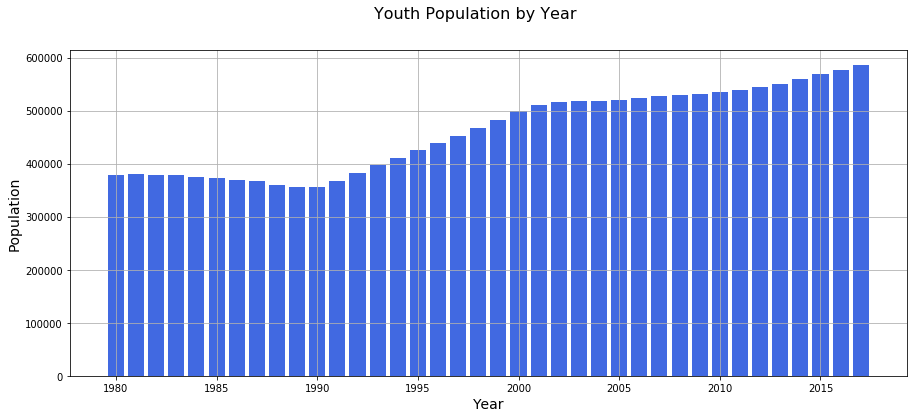

In [3]:

plt.figure(figsize=(15,6))

# loop through dataframe to build plot
for pop in youthpop_df.columns:
    plt.bar(youthpop_df.index, youthpop_df.Population, color = 'royalblue')

#Format the plot
plt.suptitle('Youth Population by Year',size = 16)
plt.xlabel('Year',size = 14)
plt.ylabel('Population',size = 14)
plt.grid()

plt.savefig('COYouthPop')
plt.show()

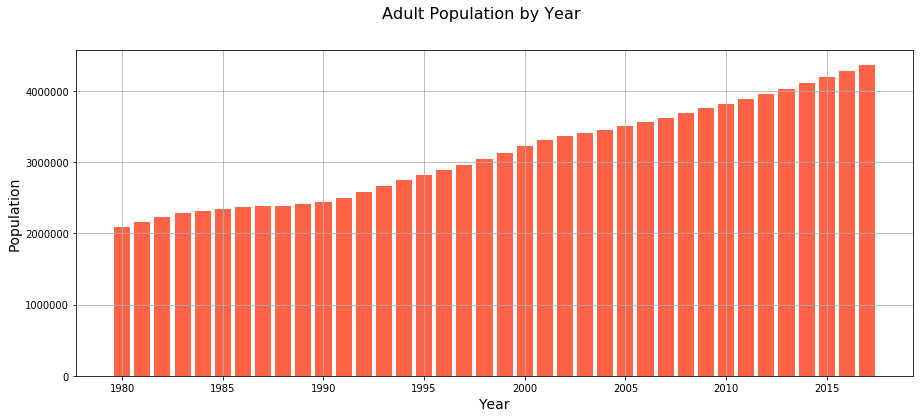

In [4]:
plt.figure(figsize=(15,6))

# loop through dataframe to build plot
for pop in adultpop_df.columns:
    plt.bar(adultpop_df.index, adultpop_df.Population, color = 'tomato')

#Format the plot
plt.suptitle('Adult Population by Year',size = 16)
plt.xlabel('Year',size = 14)
plt.ylabel('Population',size = 14)
plt.grid()

plt.savefig('COAdultPop')
plt.show()

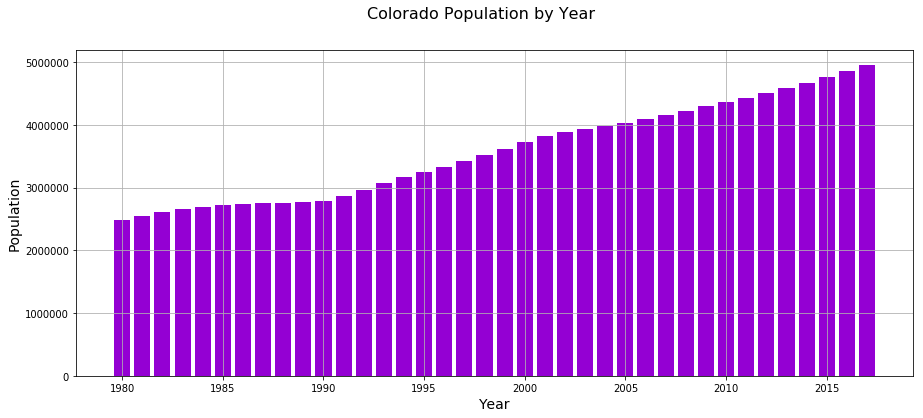

In [5]:
#change the size of the plot for better display
plt.figure(figsize=(15,6))

# Years Population Age Group Group Year

# loop through dataframe to build plot
for year in sumpop_df.columns:
    plt.bar(sumpop_df.index, sumpop_df.Population, color = 'darkviolet')

#Format the plot
plt.suptitle('Colorado Population by Year',size = 16)
plt.xlabel('Year',size = 14)
plt.ylabel('Population',size = 14)
plt.grid()

#plt.legend(loc = "lower left", labelspacing = 1, fontsize=12)

# Save the Figure
#plt.savefig('pymaceuticals_BCM_plot3')

plt.savefig('COSumPop')
plt.show()

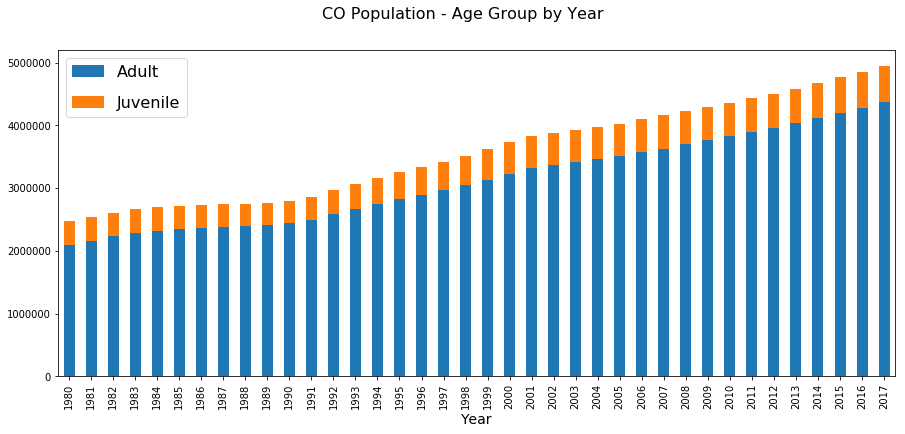

In [6]:
allpop_df.plot.bar(stacked = True, figsize = (15,6), legend = False)
plt.legend(loc = "upper left", labelspacing = 1, fontsize=16)
plt.xlabel('Year',size = 14)
plt.suptitle('CO Population - Age Group by Year',size = 16)
plt.savefig('COSumPopStacked')
plt.show()

In [86]:
# Calculate the percent change over time
# create dataframe with persent change: end size - start size / start size * 100
# popallchange = (sumpop_df.iloc[37] - sumpop_df.iloc[0]) / sumpop_df.iloc[0] * 100
popallchange_df = sumpop_df.pct_change()
popallchange_df = popallchange_df.dropna()
popallchange_df.columns = ['% Change']
popallchange_df['% Change'] = popallchange_df['% Change']


# Calculate the percent change prior 7 years
# create dataframe with persent change: end size - start size / start size * 100
popprior7 = (sumpop_df.iloc[30] - sumpop_df.iloc[24]) / sumpop_df.iloc[24] * 100
popprior7_df = pd.DataFrame(popprior7)
popprior7_df.columns = ['Prior % Change']
popprior7_df['Prior % Change'] = popprior7_df['Prior % Change'].astype(int)
# Calculate the percent change post 7 years
# create dataframe with persent change: end size - start size / start size * 100
poppost7 = (sumpop_df.iloc[37] - sumpop_df.iloc[31]) / sumpop_df.iloc[31] * 100
poppost7_df = pd.DataFrame(poppost7)
poppost7_df.columns = ['Post % Change']
poppost7_df['Post % Change'] = poppost7_df['Post % Change'].astype(int)
poppost7_df.head()

#popprior7_df.head()


,Post % Change
Population,11


In [87]:
popallchange_df.head()

,% Change
Year,
1981,0.025275
1982,0.027465
1983,0.020892
1984,0.009840
1985,0.010612


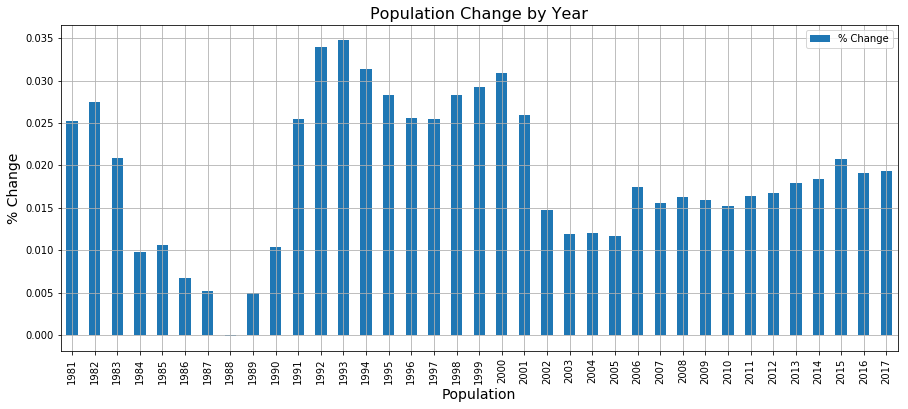

In [89]:

changeoveryears = popallchange_df.plot(kind='bar', figsize=(15,6))

changeoveryears.set_title("Population Change by Year", fontsize = 16)
changeoveryears.set_ylabel("% Change", fontsize = 14)
changeoveryears.set_xlabel("Population", fontsize = 14)
changeoveryears.grid()
#changeoveryears.xaxis.set_major_formatter(plt.NullFormatter())

plt.savefig('ChangeOverYears')
plt.show()


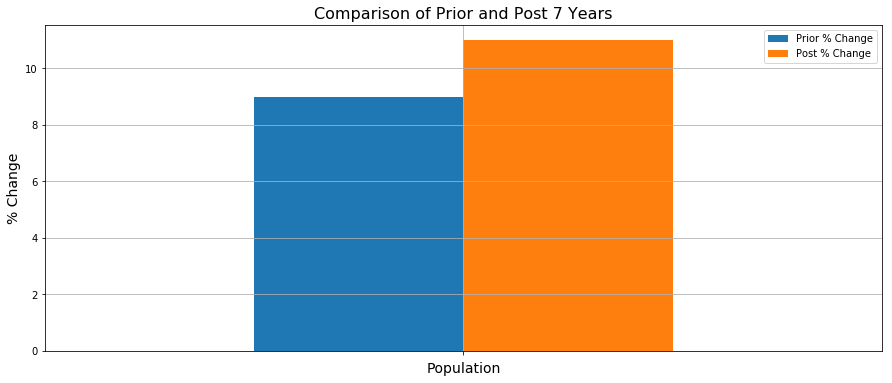

In [74]:
# gather data for bar chart
poppriorpost7_df = popprior7_df.join(poppost7_df)

# fig, compare = plt.subplots()

compare = poppriorpost7_df.plot(kind='bar', figsize=(15,6))

compare.set_title("Comparison of Prior and Post 7 Years", fontsize = 16)
compare.set_ylabel("% Change", fontsize = 14)
compare.set_xlabel("Population", fontsize = 14)
compare.grid()
compare.xaxis.set_major_formatter(plt.NullFormatter())

plt.savefig('PriorPost7')
plt.show()
